In [130]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [131]:
egdi_2003 = pd.read_csv('EGOV_DATA_2003.csv')
egdi_2004 = pd.read_csv('EGOV_DATA_2004.csv')
egdi_2005 = pd.read_csv('EGOV_DATA_2005.csv')
egdi_2008 = pd.read_csv('EGOV_DATA_2008.csv')
egdi_2010 = pd.read_csv('EGOV_DATA_2010.csv')
egdi_2012 = pd.read_csv('EGOV_DATA_2012.csv')
egdi_2014 = pd.read_csv('EGOV_DATA_2014.csv')
egdi_2016 = pd.read_csv('EGOV_DATA_2016.csv')
egdi_2018 = pd.read_csv('EGOV_DATA_2018.csv')
egdi_2020 = pd.read_csv('EGOV_DATA_2020.csv')
egdi_2022 = pd.read_csv('EGOV_DATA_2022.csv')
egdi_2024 = pd.read_csv('EGOV_DATA_2024.csv')

In [132]:
egdi = pd.concat([
    egdi_2003,
    egdi_2004,
    egdi_2005,
    egdi_2008,
    egdi_2010,
    egdi_2012,
    egdi_2014,
    egdi_2016,
    egdi_2018,
    egdi_2020,
    egdi_2022,
    egdi_2024
]).reset_index(drop=True)

In [133]:
egdi = egdi[egdi['Survey Year'] == 2024].reset_index(drop=True)

In [134]:
import itertools


egdi = egdi.iloc[:, itertools.chain([1], range(3,8))]

In [135]:
egdi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Country Name                            193 non-null    object 
 1   E-Government Index                      193 non-null    float64
 2   E-Participation Index                   193 non-null    float64
 3   Online Service Index                    193 non-null    float64
 4   Human Capital Index                     193 non-null    float64
 5   Telecommunication Infrastructure Index  193 non-null    float64
dtypes: float64(5), object(1)
memory usage: 9.2+ KB


In [136]:
egdi_melt = egdi.melt(
    id_vars='Country Name',
    value_vars=[
        'E-Government Index',
        'E-Participation Index',
        'Online Service Index',
        'Human Capital Index',
        'Telecommunication Infrastructure Index'
    ],
    var_name='Métrica',
    value_name='Escala'
)

In [137]:
egdi_melt = egdi_melt.iloc[:, [1,2]]

In [138]:
egdi_melt['Métrica'].unique()

array(['E-Government Index', 'E-Participation Index',
       'Online Service Index', 'Human Capital Index',
       'Telecommunication Infrastructure Index'], dtype=object)

In [139]:
egov = egdi_melt[egdi_melt['Métrica'] == 'E-Government Index'].reset_index(drop=True)
epart = egdi_melt[egdi_melt['Métrica'] == 'E-Participation Index'].reset_index(drop=True)
osi = egdi_melt[egdi_melt['Métrica'] == 'Online Service Index'].reset_index(drop=True)
hci = egdi_melt[egdi_melt['Métrica'] == 'Human Capital Index'].reset_index(drop=True)
tci = egdi_melt[egdi_melt['Métrica'] == 'Telecommunication Infrastructure Index'].reset_index(drop=True)

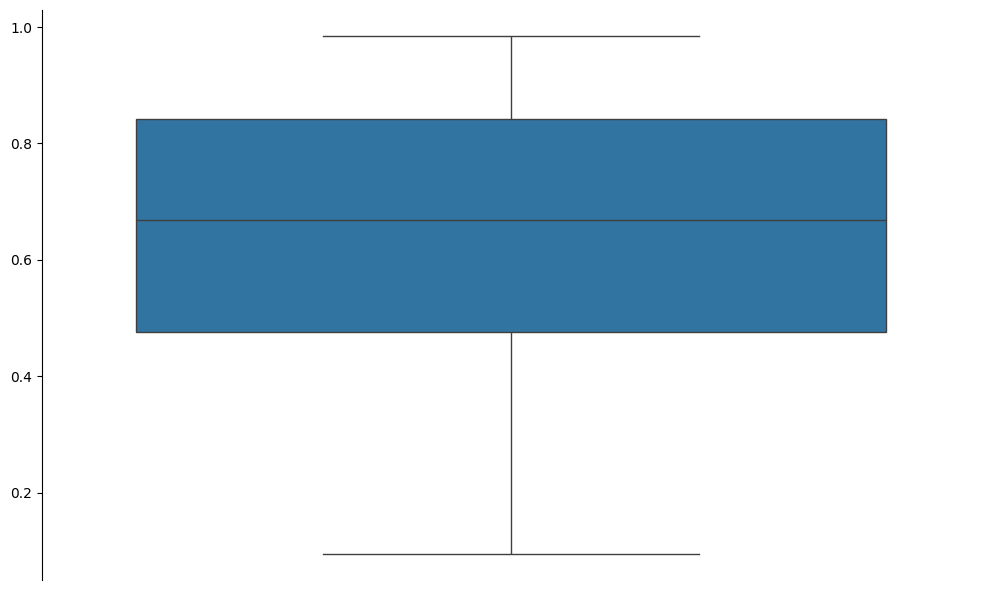

In [140]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.boxplot(data=egov, x='Métrica', y='Escala')

fig.savefig('C:/Users/lazar/Master-Dissertation/figuras/egdi/boxplot_egov_global.png')
ax.xaxis.set_visible(False)
ax.set_ylabel('')
sns.despine(bottom=True)
plt.tight_layout()
plt.show()

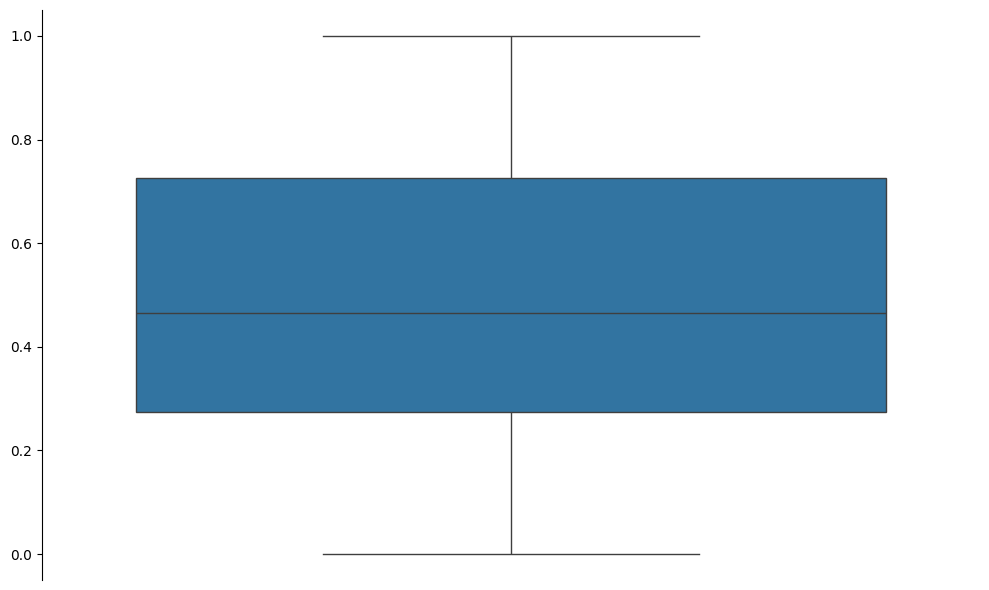

In [141]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.boxplot(data=epart, x='Métrica', y='Escala')

fig.savefig('C:/Users/lazar/Master-Dissertation/figuras/egdi/boxplot_epart_global.png')
ax.xaxis.set_visible(False)
ax.set_ylabel('')
sns.despine(bottom=True)
plt.tight_layout()
plt.show()

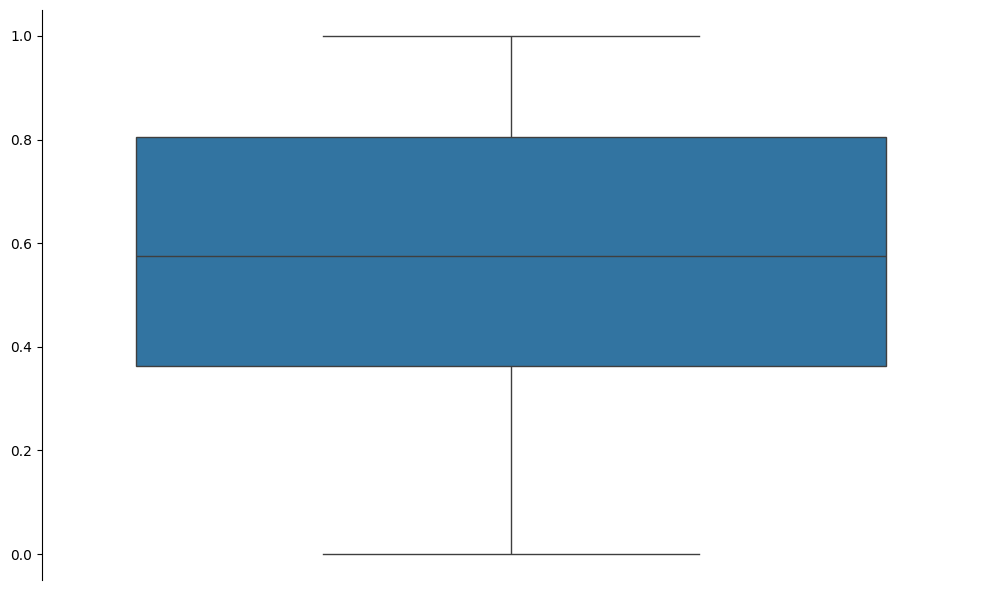

In [142]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.boxplot(data=osi, x='Métrica', y='Escala')

fig.savefig('C:/Users/lazar/Master-Dissertation/figuras/egdi/boxplot_osi_global.png')
ax.xaxis.set_visible(False)
ax.set_ylabel('')
sns.despine(bottom=True)
plt.tight_layout()
plt.show()

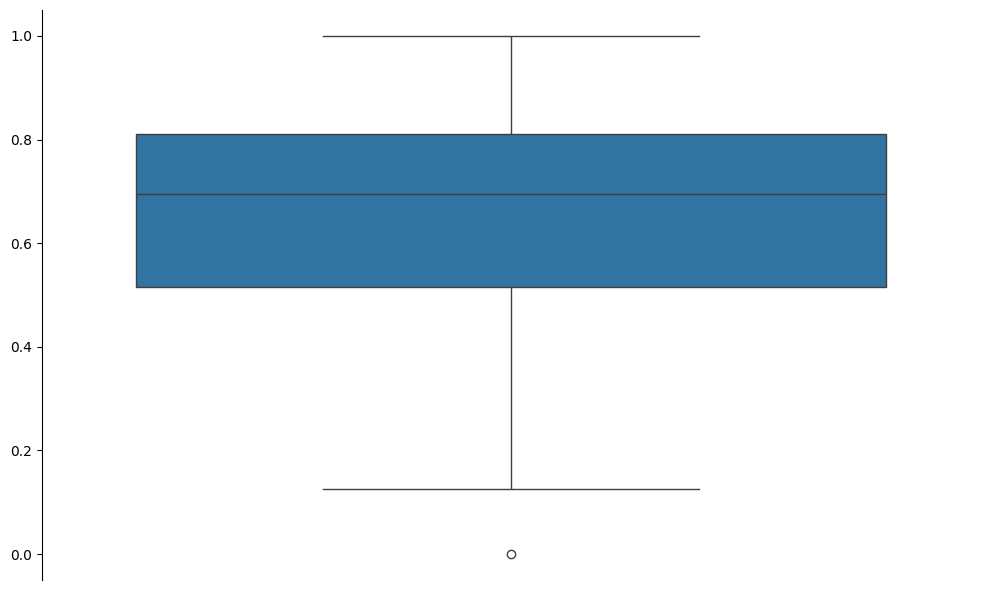

In [143]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.boxplot(data=hci, x='Métrica', y='Escala')

fig.savefig('C:/Users/lazar/Master-Dissertation/figuras/egdi/boxplot_hci_global.png')
ax.xaxis.set_visible(False)
ax.set_ylabel('')
sns.despine(bottom=True)
plt.tight_layout()
plt.show()

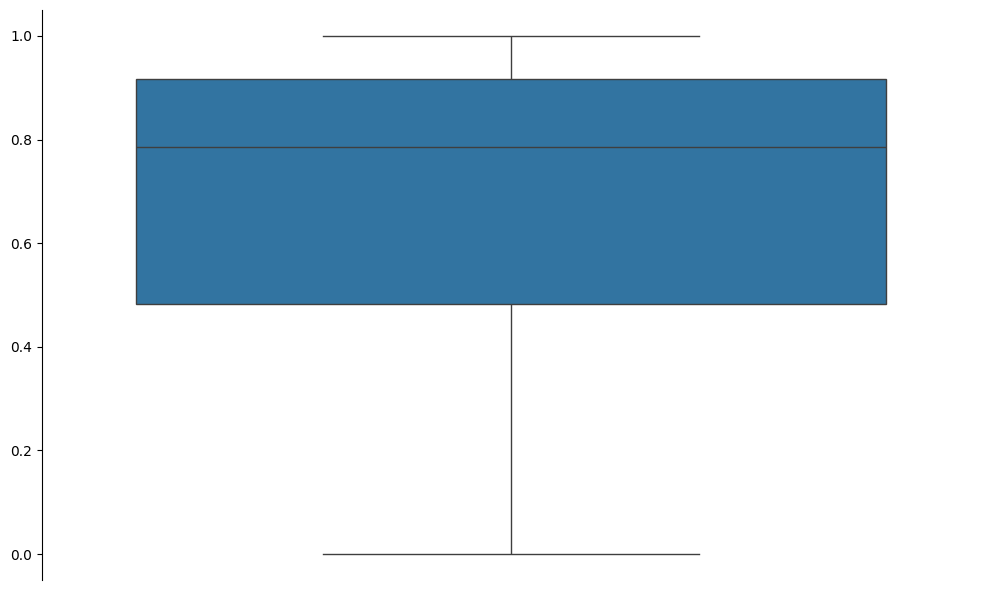

In [144]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.boxplot(data=tci, x='Métrica', y='Escala')

fig.savefig('C:/Users/lazar/Master-Dissertation/figuras/egdi/boxplot_tci_global.png')
ax.xaxis.set_visible(False)
ax.set_ylabel('')
sns.despine(bottom=True)
plt.tight_layout()
plt.show()